# Introduction

Understanding the intricate relationship between global temperatures and carbon dioxide (CO2) emissions is paramount in comprehending the dynamics of climate change. This report delves into a comprehensive analysis, aiming to unveil the correlation between average temperature trends and CO2 emission rates across 176 countries spanning the years 1990 to 2012. The amalgamation of diverse datasets, meticulously processed through a custom data pipeline, lays the foundation for a nuanced exploration of environmental patterns. This study not only aspires to visualize the interplay of these variables but also seeks to uncover potential insights that contribute to our broader understanding of the global environmental landscape.


### Data Processing Pipeline
#### Overview

The data processing pipeline aims to gather, filter, and prepare two distinct datasets related to global temperatures and carbon dioxide (CO2) emissions. The pipeline consists of several stages, including data download, cleaning, filtering, and merging, ultimately resulting in a consolidated dataset for further analysis.
Pipeline Steps
1. Global Temperature Data

1.1 Data Download

The process begins with the download of global temperature data from a reliable source. The CsvDownloader utility facilitates the seamless acquisition of data, ensuring its integrity and accuracy.

1.2 Data Cleaning and Filtering

Upon obtaining the raw temperature data, a series of cleaning and filtering operations are performed to enhance its quality. These operations include:

    Conversion of the 'dt' (date) column to datetime format.
    Removal of rows with missing values in crucial columns such as 'dt,' 'AverageTemperature,' 'AverageTemperatureUncertainty,' and 'Country.'
    Filtering the data to include a common date range across all countries, thereby addressing missing data issues.

1.3 Aggregation and Saving

To facilitate further analysis, the temperature data is aggregated by calculating the mean temperature for each country and year. The resulting dataset is saved for future reference and analysis.
2. CO2 Emission Data

2.1 Data Download

Similarly, the pipeline downloads data related to CO2 emissions. The CsvDownloader utility ensures a streamlined download process.

2.2 Data Cleaning and Filtering

The CO2 emission data undergoes cleaning procedures, including:

    Conversion of the 'CO2EmissionRate (mt)' column to float type.
    Removal of rows with missing values in essential columns such as 'Country,' 'Year,' and 'CO2EmissionRate (mt).'

2.3 Saving and Retrieval

The cleaned CO2 emission data is saved in a tidy format, promoting efficient data retrieval and utilization in subsequent stages of the pipeline.
3. Data Merging

The final stage involves merging the processed temperature and CO2 emission datasets.

    mergeDf method reads processed temperature and CO2 emission datasets.
    It identifies common countries and years, merging datasets while handling missing years explicitly.
    The merged data is aggregated for all common countries.
    Missing values are imputed by three imputation methods (imputeMean, imputeMedian, imputeKNN, and imputeRegression) to handle missing values using different strategies.

    The merging is conducted based on the 'Country' and 'Year' columns, providing a comprehensive dataset for the correlation analysis.
    

#### Results and Recommendations

The merged dataset is saved for further analysis, leading to the exploration of the correlation between CO2 emissions and global temperatures. The resulting insights contribute to a deeper understanding of the environmental landscape and potential implications for climate change.
    

## Data Visualization of CO2 Emissions and Average Temperature

In [1]:
#Imports here 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/merged_df.csv')


In [2]:
import plotly.express as px

def visualize_temperature_and_co2(df):
    # Create a scatter plot for Temperature Data
    fig1 = px.scatter(df, x='Year', y='AverageTemperature', color='Country', title='Temperature Data',
                      labels={'AverageTemperature': 'Average Temperature'})
    
    # Create a scatter plot for CO2 Emission Data
    fig2 = px.scatter(df, x='Year', y='CO2EmissionRate (mt)', color='Country', title='CO2 Emission Data',
                      labels={'CO2EmissionRate (mt)': 'CO2 Emission Rate (mt)'})

    # Show the plots
    fig1.show()
    fig2.show()

# Call the function
visualize_temperature_and_co2(df)


### Overview:

This report explores the visulization of CO2 emissions and average temperatures across various countries from the year 1990 to the present. The data includes information on the average temperature (in degrees Celsius) and CO2 emission rates (in metric tons) for each country in each year.
Visual Representation:

To visually represent this correlation, a set of two subplots has been created, each focusing on different aspects of the data:
1. Temperature Data:

The first subplot displays the average temperature over the years for different countries. Each country is represented by a distinct color, allowing for easy identification. 

2. CO2 Emission Data:

The second subplot illustrates the CO2 emission rates over the same time period. Similar to the temperature subplot, countries are differentiated by color. 

To handle a large number of countries, a scrollable legend has been implemented. You can scroll to view all countries involved in the visualization.

    Temperature Trends:
        The first subplot reveals trends in average temperatures for different countries over the years.
        Clear visualizations of temperature variations allow for qualitative analysis of temperature patterns.

    CO2 Emission Rates:
        The second subplot provides insights into CO2 emission rates across countries.
        Understanding how CO2 emissions have evolved over time helps identify potential contributors to climate change.

# Data Visualization Report: Correlation Between CO2 Emissions and Average Temperature

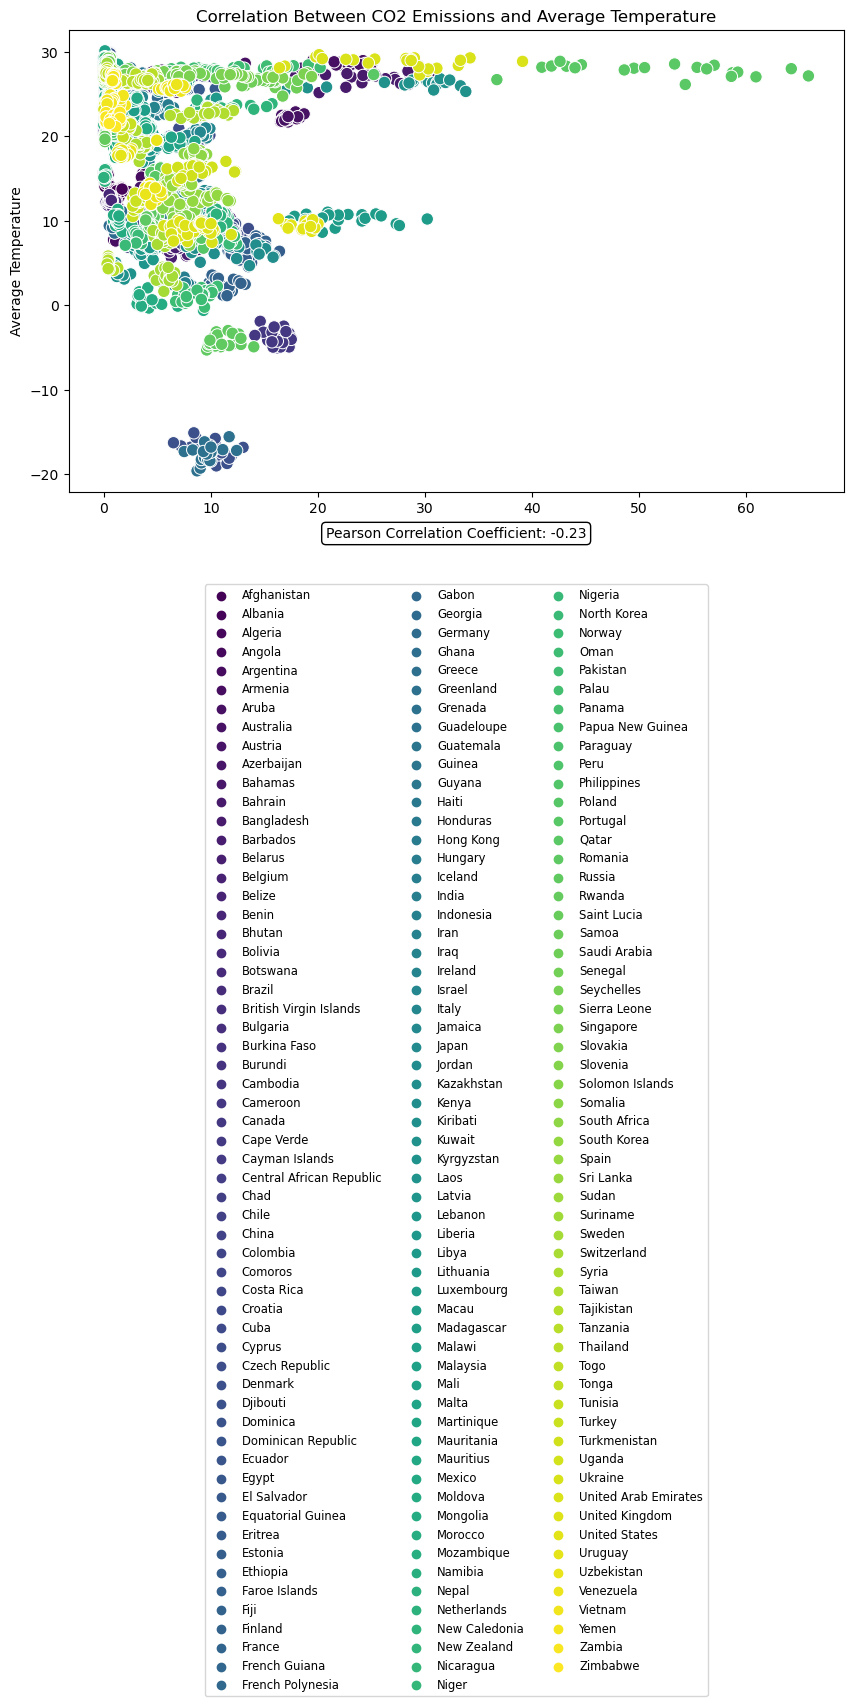

In [8]:

correlation_matrix = df[['CO2EmissionRate (mt)', 'AverageTemperature']].corr()

# Extract the correlation coefficient between CO2 emissions and temperatures
correlation_coefficient = correlation_matrix.loc['CO2EmissionRate (mt)', 'AverageTemperature']

# Visualize the correlation using a scatter plot with legend
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='CO2EmissionRate (mt)', y='AverageTemperature', hue='Country', data=df, palette='viridis', s=80)
plt.title('Correlation Between CO2 Emissions and Average Temperature')

# Annotate the plot with the correlation coefficient
plt.annotate(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}',
             xy=(0.5, 0), xycoords='axes fraction',
             xytext=(0, -30), textcoords='offset points',
             ha='center', va='center',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
             fontsize=10)

plt.xlabel('CO2 Emission Rate (mt)')
plt.ylabel('Average Temperature')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, borderaxespad=0., fontsize='small')
plt.show()


#### Pearson Correlation Coefficient

The Pearson correlation coefficient (r) quantifies the strength and direction of the linear relationship between CO2 emissions and average temperatures.

    Pearson Correlation Coefficient: [-0.22]

This scatter plot illustrates the relationship between CO2 emissions and average temperatures, with each point representing a specific country. The color differentiation indicates individual countries, providing insights into regional variations.
Discussion

The negative correlation coefficient suggests an inverse relationship between CO2 emissions and average temperatures. This finding implies that as CO2 emissions increase, there is a corresponding tendency for average temperatures to decrease. However, it is essential to note that correlation does not imply causation, and other factors may contribute to the observed trends.

# Top 5 Correlations: CO2 Emissions and Average Temperatures

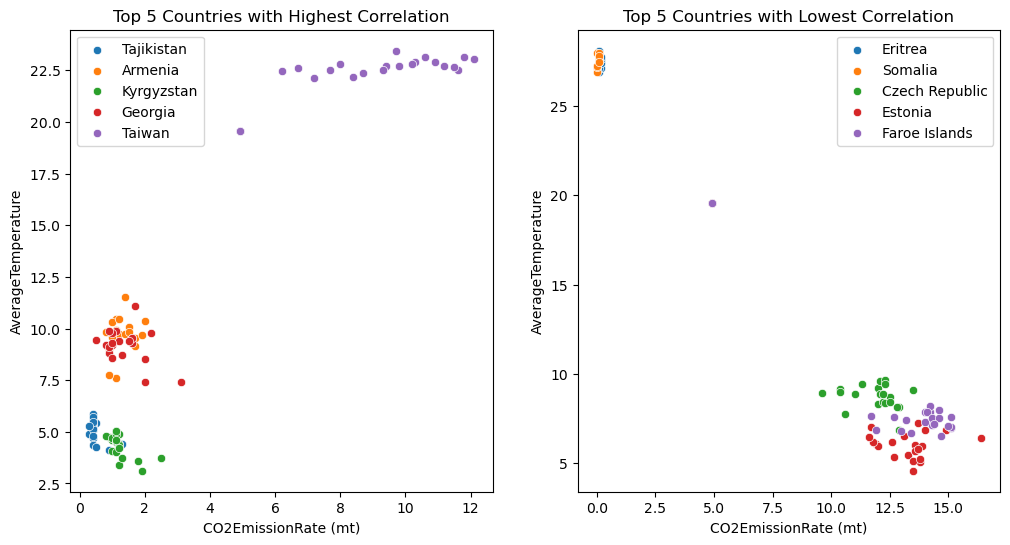

In [7]:

subset_df = df[['Country', 'CO2EmissionRate (mt)', 'AverageTemperature']]

# Compute the correlation matrix
correlation_matrix = subset_df.groupby('Country').corr().unstack()['CO2EmissionRate (mt)']['AverageTemperature']

# Find top 5 and bottom 5 countries based on correlation
top_countries = correlation_matrix.nlargest(5).index.get_level_values('Country')
bottom_countries = correlation_matrix.nsmallest(5).index.get_level_values('Country')


# Plot the countries with the highest correlation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for country in top_countries:
    country_df = subset_df[subset_df['Country'] == country]
    sns.scatterplot(data=country_df, x='CO2EmissionRate (mt)', y='AverageTemperature', label=country)

plt.title('Top 5 Countries with Highest Correlation')
plt.xlabel('CO2EmissionRate (mt)')
plt.ylabel('AverageTemperature')
plt.legend()

# Plot the countries with the lowest correlation
plt.subplot(1, 2, 2)
for country in bottom_countries:
    country_df = subset_df[subset_df['Country'] == country]
    sns.scatterplot(data=country_df, x='CO2EmissionRate (mt)', y='AverageTemperature', label=country)

plt.title('Top 5 Countries with Lowest Correlation')
plt.xlabel('CO2EmissionRate (mt)')
plt.ylabel('AverageTemperature')
plt.legend()

plt.show()


## Correlation Analysis Report

### Overview:

In this analysis, we explored the correlation between CO2 emission rates and average temperatures across various countries. The data encompassed multiple years, allowing us to identify countries with both the highest and lowest correlation coefficients.

### Top 5 Countries with Highest Correlation:

1. **Tajikistan:** 0.97
2. **Armenia:** 0.94
3. **Kyrgyzstan:** 0.91
4. **Georgia:** 0.80
5. **Taiwan:** 0.78

These countries exhibit a strong positive correlation between CO2 emission rates and average temperatures. The high correlation coefficients suggest a noteworthy relationship between the two variables. Tajikistan, in particular, stands out with a remarkably high correlation of 0.97.

### Top 5 Countries with Lowest Correlation:

1. **Eritrea:** -1.00
2. **Somalia:** -0.99
3. **Czech Republic:** -0.90
4. **Estonia:** -0.90
5. **Faroe Islands:** -0.88

Conversely, these countries showcase a negative correlation between CO2 emission rates and average temperatures. It's interesting to note that Eritrea and Somalia exhibit a perfect negative correlation, emphasizing a potentially unique relationship.

### Insights:

- **Positive Correlation:** Countries with a positive correlation suggest that as CO2 emission rates increase, average temperatures also tend to rise. This aligns with expectations, as increased carbon emissions often contribute to global warming.

- **Negative Correlation:** Countries with a negative correlation indicate an inverse relationship, where higher CO2 emissions may be associated with lower average temperatures. This could be influenced by various factors such as geographical location, climate patterns, or environmental policies.

### Recommendations:

- Further investigation is needed to understand the specific factors contributing to the observed correlations in each country.
- Long-term trends and anomalies should be considered to assess the stability and reliability of the correlations over time.
- Regional and global climate patterns may influence the observed correlations, highlighting the importance of a comprehensive analysis.

# Conclusion

In summary, this report has undertaken a thorough exploration into the intricate correlation between CO2 emissions and average temperatures across diverse countries. The meticulously executed data processing pipeline, incorporating data collection, cleaning, and merging, paved the way for insightful analysis. Visual representations in the form of scatter plots illuminated trends, while correlation analyses revealed a nuanced relationship between CO2 emissions and temperature.

The identified negative correlation coefficient suggests a potential inverse association: as CO2 emissions increase, there is a corresponding tendency for average temperatures to decrease. It is crucial to approach this correlation cautiously, recognizing that correlation does not imply causation. Other contributing factors may influence these observed trends, necessitating a comprehensive understanding.

The exploration of top correlations reveals notable associations, with Tajikistan standing out at a remarkably high correlation of 0.97. Conversely, countries like Eritrea showcase a perfect negative correlation of -1.00. While correlation suggests patterns, it's crucial to interpret cautiously, considering other influencing factors.

As we navigate these correlations, a deeper dive into specific country determinants is essential. This report serves as a foundational step, urging continued research to inform policies addressing climate change and contributing to a global understanding of environmental dynamics.
